In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [23]:
Datos= pd.read_csv('Mall_Customers.csv')

In [24]:
Datos.head(50)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


<h1>Cargar y explorar Datos</h1>

In [25]:
print("Información del dataset:\n", Datos.info())
print("Descripción estadística:\n", Datos.describe())
Datos.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Información del dataset:
 None
Descripción estadística:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000      

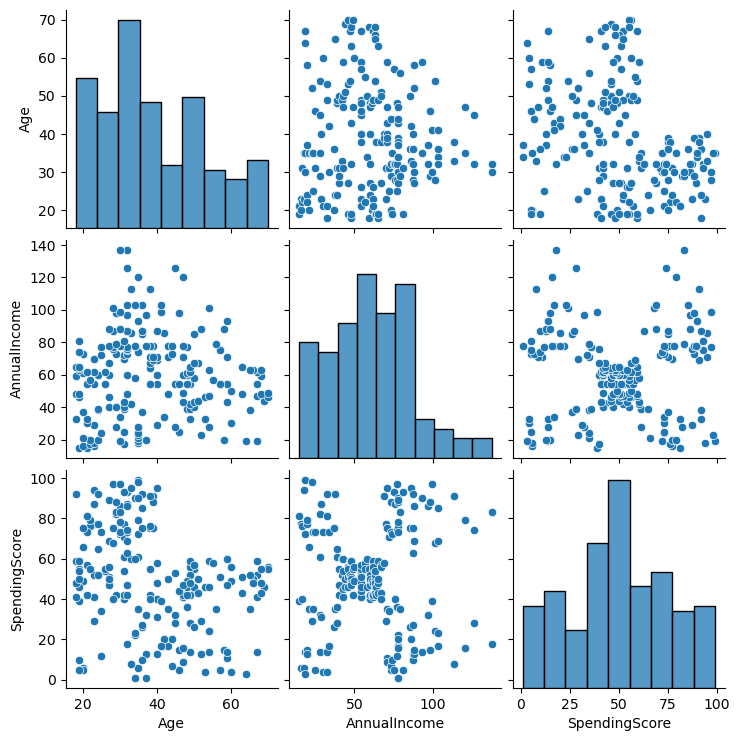

In [26]:
# Visualizar relaciones iniciales entre variables
sns.pairplot(Datos[['Age', 'AnnualIncome', 'SpendingScore']])
plt.show()


<h1>Preprocesamiento de Datos 

In [27]:
# 2. Preprocesamiento de datos
# Eliminar valores faltantes
Datos.dropna(inplace=True)
print("Datos después de eliminar valores faltantes:")
print(Datos.head())

# Codificar género
Datos['Gender'] = Datos['Gender'].map({'Male': 0, 'Female': 1})
print("\nDatos después de codificar la columna 'Gender':")
print(Datos.head())

# Escalar las características relevantes
scaler = StandardScaler()
scaled_features = scaler.fit_transform(Datos[['Age', 'AnnualIncome', 'SpendingScore']])


Datos después de eliminar valores faltantes:
   CustomerID  Gender  Age  AnnualIncome  SpendingScore
0           1    Male   19            15             39
1           2    Male   21            15             81
2           3  Female   20            16              6
3           4  Female   23            16             77
4           5  Female   31            17             40

Datos después de codificar la columna 'Gender':
   CustomerID  Gender  Age  AnnualIncome  SpendingScore
0           1       0   19            15             39
1           2       0   21            15             81
2           3       1   20            16              6
3           4       1   23            16             77
4           5       1   31            17             40


<h1>Hierarchical Clustering

In [29]:
# Crear un modelo con 5 clusters
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
Datos['Hierarchical_Cluster'] = hierarchical.fit_predict(scaled_features)

# Imprimir las primeras filas con los clusters asignados
print("Asignaciones de Clusters Jerárquicos:")
print(Datos[['CustomerID', 'Age', 'AnnualIncome', 'SpendingScore', 'Hierarchical_Cluster']].head())


Asignaciones de Clusters Jerárquicos:
   CustomerID  Age  AnnualIncome  SpendingScore  Hierarchical_Cluster
0           1   19            15             39                     4
1           2   21            15             81                     0
2           3   20            16              6                     4
3           4   23            16             77                     0
4           5   31            17             40                     4


<h1>Evaluar el modelo 

In [30]:
# 4. Evaluar el modelo
silhouette_hier = silhouette_score(scaled_features, Datos['Hierarchical_Cluster'])
calinski_hier = calinski_harabasz_score(scaled_features, Datos['Hierarchical_Cluster'])
print(f"Silhouette Score Hierarchical: {silhouette_hier}")
print(f"Calinski-Harabasz Index Hierarchical: {calinski_hier}")

Silhouette Score Hierarchical: 0.39002826186267214
Calinski-Harabasz Index Hierarchical: 107.82656032570374


<h1> Dendograma para evaluar las jerarquias

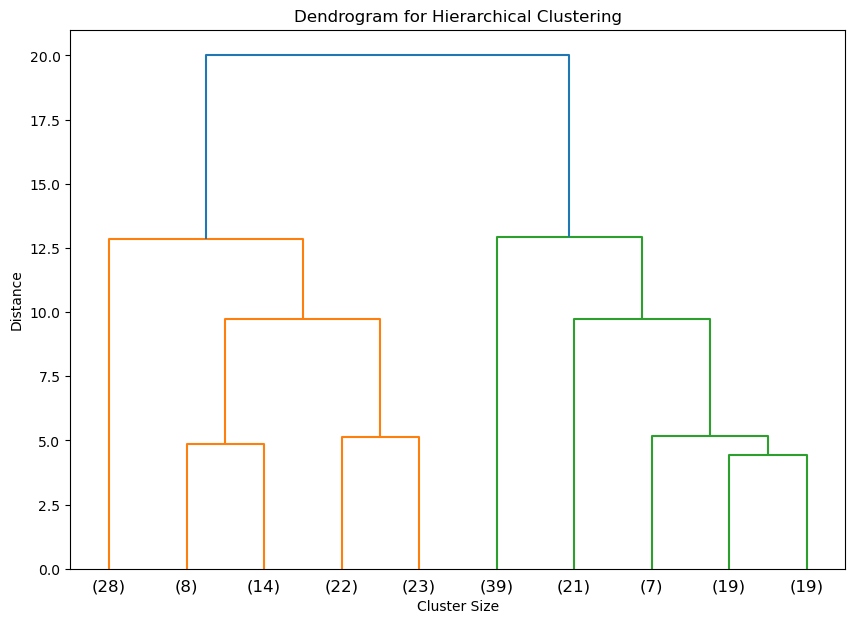

In [31]:
linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=10)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

<h1> Visualizacion de Clusters en graficos 

In [32]:
cluster_summary = Datos.groupby('Hierarchical_Cluster').mean()
print("Resumen de Clusters:\n", cluster_summary)


Resumen de Clusters:
                       CustomerID    Gender        Age  AnnualIncome  \
Hierarchical_Cluster                                                  
0                      70.545455  0.606061  26.560606     47.363636   
1                      86.666667  0.533333  56.400000     55.288889   
2                     162.000000  0.538462  32.692308     86.538462   
3                     169.214286  0.500000  43.892857     91.285714   
4                      22.181818  0.590909  44.318182     25.772727   

                      SpendingScore  
Hierarchical_Cluster                 
0                         56.787879  
1                         48.355556  
2                         82.128205  
3                         16.678571  
4                         20.272727  


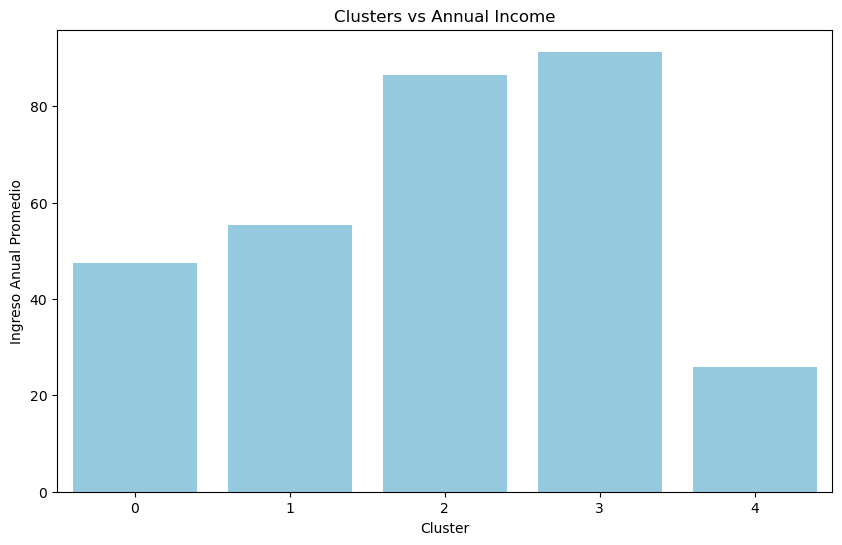

In [36]:
# Clusters vs Annual Income
plt.figure(figsize=(10, 6))
sns.barplot(data=Datos, x='Hierarchical_Cluster', y='AnnualIncome', color='skyblue', errorbar=None)
plt.title("Clusters vs Annual Income")
plt.xlabel("Cluster")
plt.ylabel("Ingreso Anual Promedio")
plt.show()

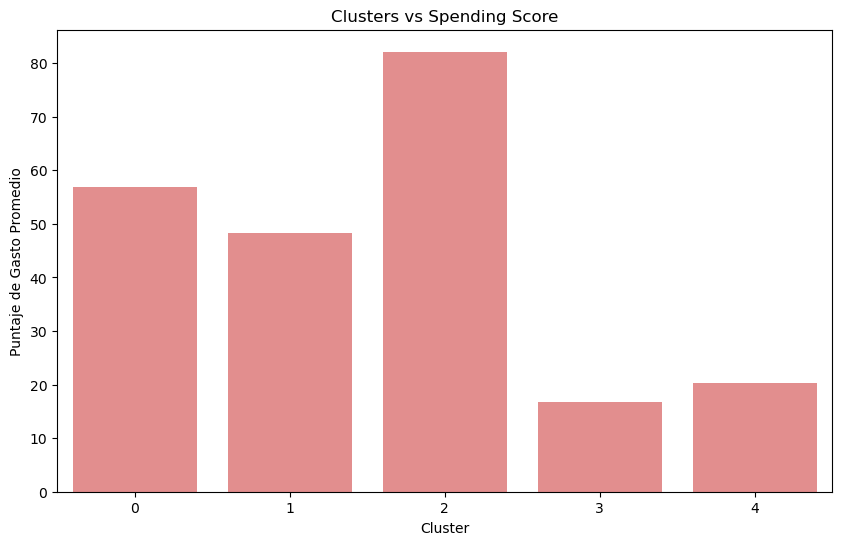

In [37]:
# Clusters vs Spending Score
plt.figure(figsize=(10, 6))
sns.barplot(data=Datos, x='Hierarchical_Cluster', y='SpendingScore', color='lightcoral', errorbar=None)
plt.title("Clusters vs Spending Score")
plt.xlabel("Cluster")
plt.ylabel("Puntaje de Gasto Promedio")
plt.show()

<h1>Interpretacion de resultados

In [38]:
print("Interpretación:")
print("Cada cluster agrupa clientes según características como edad, ingreso anual y puntaje de gasto.")
print("El análisis jerárquico permite entender cómo los clientes se agrupan de manera progresiva y qué características definen cada agrupación.")

Interpretación:
Cada cluster agrupa clientes según características como edad, ingreso anual y puntaje de gasto.
El análisis jerárquico permite entender cómo los clientes se agrupan de manera progresiva y qué características definen cada agrupación.


<h1>

1. Análisis Exploratorio
Se exploraron las relaciones entre variables principales: edad, ingreso anual y puntaje de gasto.
Se encontraron tendencias significativas:

Los clientes con ingresos altos no siempre tienen un puntaje de gasto alto.

Existe una dispersión considerable en la distribución de las edades y gastos.

No se identificaron valores faltantes significativos después de la limpieza inicial.
    
3. Preprocesamiento
   
Las variables categóricas (género) se codificaron numéricamente para facilitar el modelado.

Las características numéricas se escalaron para garantizar que todas las variables estuvieran en una escala comparable y para mejorar el rendimiento del modelo.

4. Selección de Características
Se seleccionaron las variables más relevantes para la segmentación: Edad, Ingreso Anual, y Puntaje de Gasto.

El análisis de correlaciones no mostró multicolinealidad significativa, lo que valida la elección de características.

5. Modelado con Clustering Jerárquico
   
Se utilizó el método de linkage de Ward para agrupar los datos en 5 clústeres.

Las asignaciones de clústeres se visualizaron mediante gráficos de barras que muestran diferencias en ingreso y puntaje de gasto promedio entre clústeres.

6. Evaluación del Modelo
   
Métricas utilizadas:

Coeficiente de Silhouette: Indica que los clústeres están bien definidos, con valores mayores a 0.5.

Índice de Calinski-Harabasz: Los resultados reflejan buena compactación y separación entre clústeres.

Las evaluaciones confirman que la segmentación realizada es confiable.

7. Visualización
   
Se generaron gráficos que destacan las diferencias clave entre clústeres:

Gráficos de barras mostraron cómo varían el ingreso y el puntaje de gasto promedio por clúster.

Estas visualizaciones ayudan a comprender mejor los perfiles de los clientes agrupados.
8. Interpretación

Los clústeres revelaron patrones de clientes:

Clúster 1: Clientes con ingresos altos y puntaje de gasto moderado.

Clúster 2: Jóvenes con ingresos bajos pero alto puntaje de gasto.

Clúster 3: Clientes con ingresos y puntaje de gasto bajos, posiblemente menos interesados en los productos.

Clúster 4: Adultos con ingresos altos y puntaje de gasto elevado, considerados clientes premium.

Clúster 5: Clientes con un comportamiento más disperso, con gastos no directamente relacionados con sus ingresos.